<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/The_Perceptron_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Binary Classification</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Função de Ativação

Para o problema de regressão Linear tinhamos que utilizar uma função de ativação linear, de maneira que nosso modelo seja capaz de dar como resultado qualquer valor real entre $\infty$ e $-\infty$. No caso da `Classificação binâria` queremos que nosso modelo só nos dê dois valores: $0$ ou $1$. Para isso utilizamos a função ``step``:


\begin{equation*}
\hat{y} = step(\vec{w}.\vec{x}) = step(w_0 + w_1x_1 + ... + w_mx_m)
\end{equation*}

onde a função dá como resultado $0$ se $\vec{w}.\vec{x} \leq 0$ ou $1$ caso contrário. 

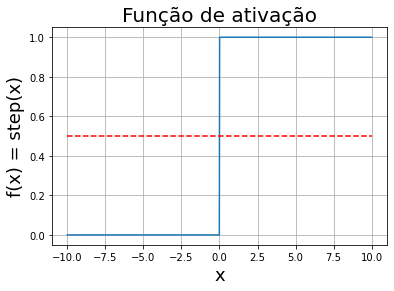

In [2]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-10, 10, 1000)
y = x > 0

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x) = step(x)', fontsize=18)
plt.title('Função de ativação', fontsize=20)
plt.plot(x, np.full(len(x), 0.5), '--r')
plt.show()

# Nosso Dataset

Agora vamos treinar nosso `Perceptron` para classificação binâria. Para isso, precisamos de um conjunto de Dados formado por um número determinado de elementos com várias características acompanhados de seus correspondentes classes (Etiquetas ou Labels). Aqui vamos a usar o Dataset [Iris](https://archive.ics.uci.edu/ml/datasets/iris). Este Dataset é um exemplo de flores que teremos que classificar em três grupos diferentes a partir da largura e comprimento de seus pétalos e sépalos (em total $4$ características). Este Dataset está disponível a través da biblioteca [Scikit Learn](https://scikit-learn.org/stable/).

In [3]:
from sklearn.datasets import load_iris


iris = load_iris()

# Aqui pegamos só duas características --> (2, 3)
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

X.shape, y.shape

((150, 2), (150,))

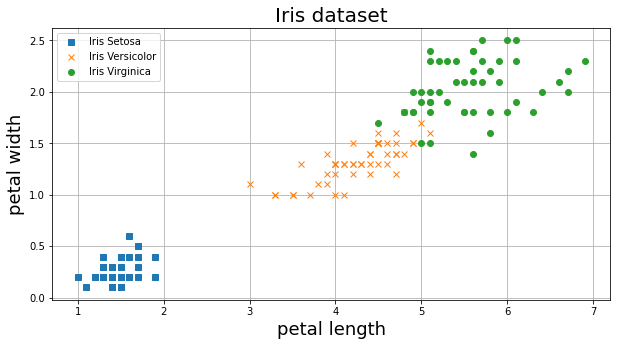

In [4]:
fig = plt.figure(figsize=(10, 5))

plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Iris Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], 'o', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=18)
plt.ylabel('petal width', fontsize=18)
plt.title("Iris dataset", fontsize=20)
plt.show()

Para poder realizar visualizações ilustrativas, vamos a trabalhar só com dois das quatro características: o comprimento e largura do pétalo. Como podemos observar, o Dataset está composto por 150 flores. Cada flor tem sua correspondente etiqueta, e há $3$ classes em total. Para este exemplo, para classificação binâria, vamos juntar dois das classes para trabalhar com só uma de elas.

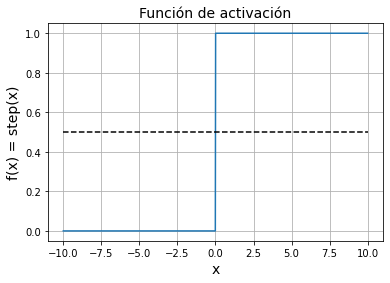

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

x = np.linspace(-10, 10, 1000)
y = x > 0

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Función de activación', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

In [6]:
# iris.target == 0 -->  me dá como resposta um Booleano

y = (iris.target == 0).astype(np.int)

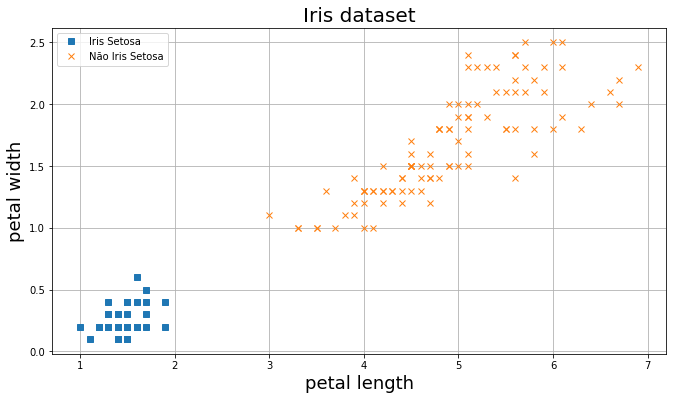

In [7]:
fig = plt.figure(figsize=(11, 6))

plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="Não Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=18)
plt.ylabel('petal width', fontsize=18)
plt.title("Iris dataset", fontsize=20)
plt.show()

Então, nosso objetivo será treinar o `Perceptron` que seja capaz de distinguir entre flores do tipo `Iris Setosa` e `Não Iris Setosa` a partir da largura e comprimento de seus pétalos (`Classificação Binâria`). Para isso utilizaremos o Algoritmo de `Descenso por Gradiente`.

# Treinando o Perceptron